In [14]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mp
%matplotlib inline 
sb.set(style="ticks")

In [15]:
data = pd.read_csv('country_vaccinations.csv', sep=",")

In [16]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [17]:
data.shape

(3555, 15)

In [18]:
total_count = data.shape[0]
print(f'Всего строк: {total_count}')

Всего строк: 3555


In [19]:
data.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [20]:
data.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [21]:
for data_column in data.columns:
    temp_null_count = data[data[data_column].isnull()].shape[0]
    print(f'{data_column} - {temp_null_count}')

country - 0
iso_code - 272
date - 0
total_vaccinations - 1214
people_vaccinated - 1615
people_fully_vaccinated - 2277
daily_vaccinations_raw - 1583
daily_vaccinations - 135
total_vaccinations_per_hundred - 1214
people_vaccinated_per_hundred - 1615
people_fully_vaccinated_per_hundred - 2277
daily_vaccinations_per_million - 135
vaccines - 0
source_name - 0
source_website - 0


In [22]:
data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.341000e+03,1.940000e+03,1.278000e+03,1.972000e+03,3.420000e+03,2341.000000,1940.000000,1278.000000,3420.000000
mean,1.486319e+06,1.238670e+06,3.796973e+05,7.404549e+04,5.718444e+04,6.074088,5.177969,1.791369,2284.028070
std,4.911831e+06,4.052163e+06,1.418143e+06,2.052344e+05,1.778443e+05,11.429798,8.545284,4.569888,3829.687329
min,0.000000e+00,0.000000e+00,1.000000e+00,-5.001200e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.918300e+04,2.636475e+04,8.366000e+03,1.970750e+03,1.178750e+03,0.580000,0.590000,0.130000,346.750000
50%,1.895250e+05,1.661540e+05,3.328900e+04,1.142100e+04,6.034500e+03,2.370000,2.330000,0.710000,1024.000000
75%,7.496820e+05,6.296642e+05,1.914042e+05,5.655075e+04,2.897950e+04,5.410000,4.320000,1.460000,1942.000000
max,5.958504e+07,4.197740e+07,1.703912e+07,2.242472e+06,1.916190e+06,85.420000,49.640000,35.780000,30869.000000


In [30]:
data['daily_vaccinations'].unique()

array([   nan,    64.,    63., ..., 23033., 22012., 20649.])

<AxesSubplot:xlabel='people_vaccinated', ylabel='daily_vaccinations'>

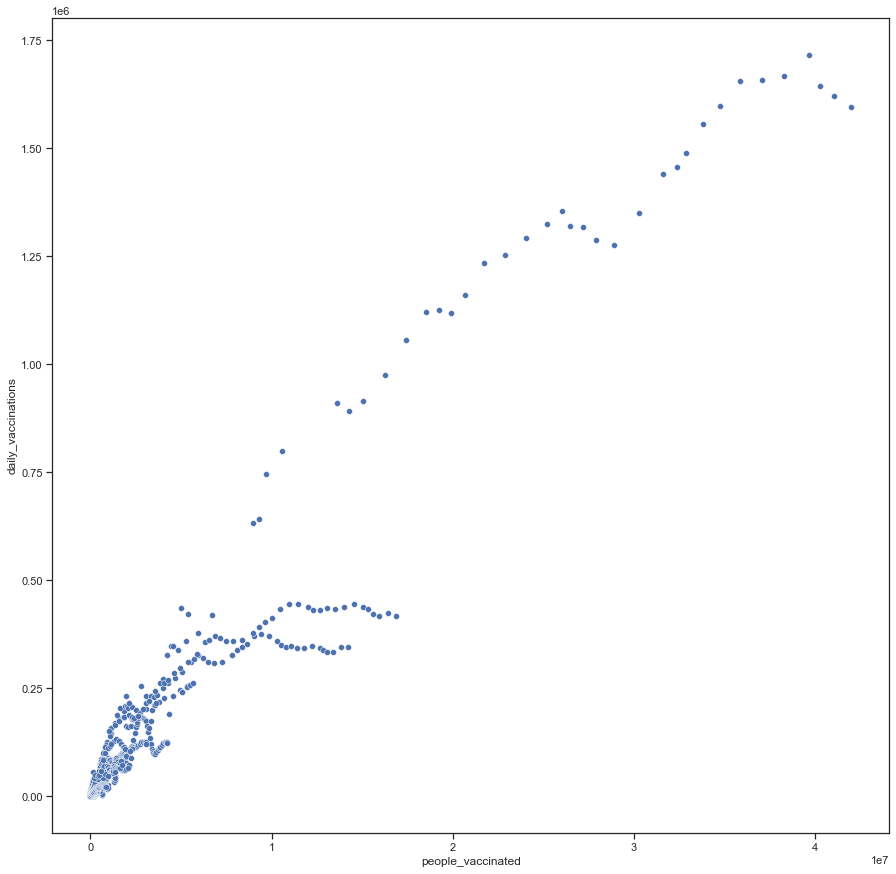

In [33]:
fig, ax = mp.subplots(figsize=(15,15)) 
sb.scatterplot(
    ax=ax, 
    x='people_vaccinated', 
    y='daily_vaccinations', 
    data=data
)

<AxesSubplot:xlabel='people_vaccinated', ylabel='daily_vaccinations'>

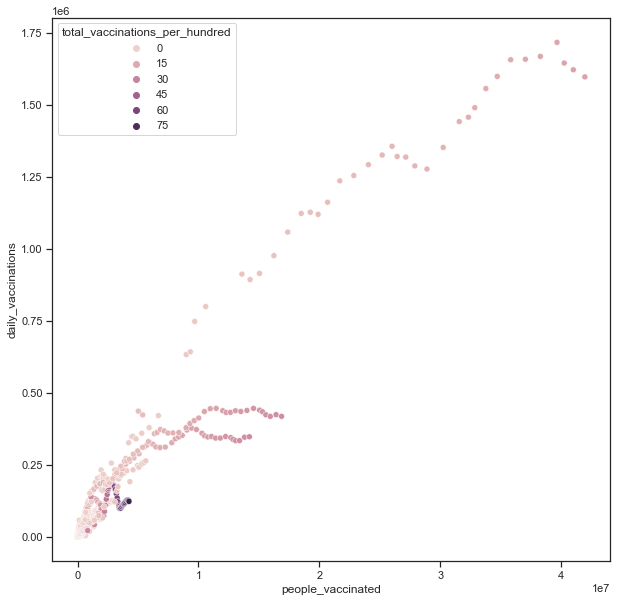

In [34]:
fig, ax = mp.subplots(figsize=(10,10)) 
sb.scatterplot(
    ax=ax, 
    x='people_vaccinated', 
    y='daily_vaccinations', 
    data=data, 
    hue='total_vaccinations_per_hundred'
)

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='people_fully_vaccinated_per_hundred', ylabel='Density'>

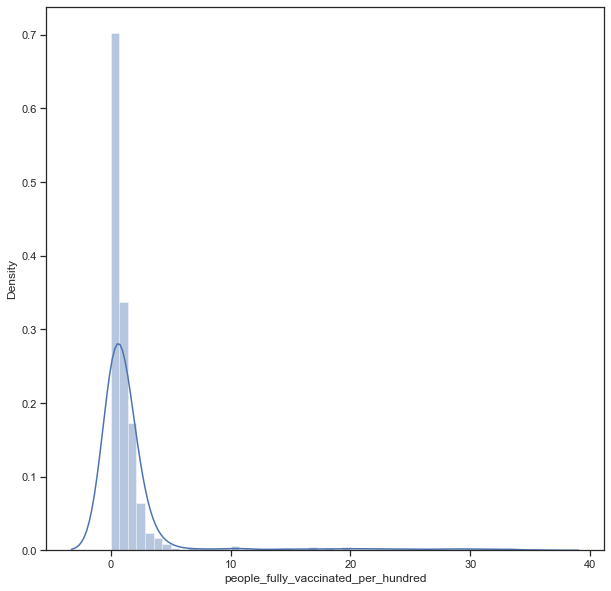

In [38]:
fig, ax = mp.subplots(figsize=(10,10)) 
sb.distplot(data['people_fully_vaccinated_per_hundred'])

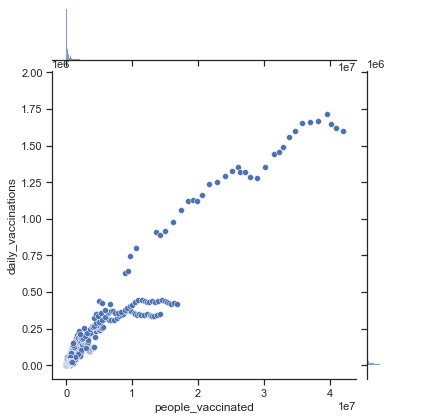

In [39]:
sb.jointplot(x='people_vaccinated', y='daily_vaccinations', data=data)

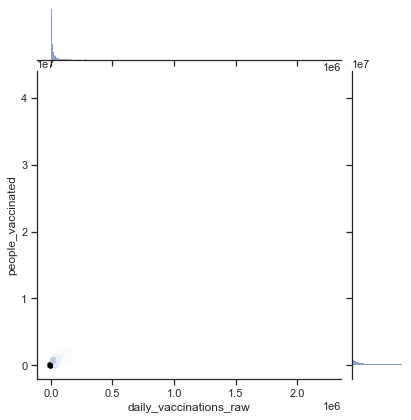

In [44]:
sb.jointplot(
    x='daily_vaccinations_raw', 
    y='people_vaccinated', 
    data=data, 
    kind="hex"
)

In [ ]:
sb.jointplot(
    x='daily_vaccinations_raw', 
    y='people_vaccinated', 
    data=data, 
    kind="kde"
)